Importer les Bibliothèques Nécessaires

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ,StandardScaler , LabelEncoder
from sklearn.feature_selection import mutual_info_regression

import os
import math

Lire le jeu de données et supprimer les colonnes Id, Alley et Fence, car Id n'est pas nécessaire et Alley ainsi que Fence contiennent beaucoup de valeurs manquantes et ne sont pas utiles dans le dataset, car elles n'influencent pas beaucoup le prix


In [101]:
train = pd.read_csv("..//Housing-prices-competition//home-data-for-ml-course/train.csv")
test = pd.read_csv("..//Housing-prices-competition//home-data-for-ml-course/test.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.columns = train.columns.astype(str).str.strip()

test.columns = test.columns.astype(str).str.strip()
y_SalePrice = train['SalePrice']

train.drop("Id", axis = 1, inplace = True)
train.drop("SalePrice", axis = 1, inplace = True)

test.drop("Id", axis = 1, inplace = True)

In [102]:
print("Taille de train "  , train.shape)
print("Taille de test" , test.shape)

Taille de train  (1460, 79)
Taille de test (1459, 79)


In [103]:
print("\nNombre de features de chaque type :")
print(train.dtypes.value_counts())


Nombre de features de chaque type :
object    46
int64     33
Name: count, dtype: int64


détecter les types généraux

In [104]:
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

print("Catégorielles :", categorical_features)
print("Numériques :", numerical_features)



Catégorielles : Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
Numériques : Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath

  valeurs manquantes 

In [105]:
train.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Vérification des types de données et conversion

In [106]:


# Convertir les colonnes contenant des nombres sous forme de texte en int ou float

train['LotFrontage'] = pd.to_numeric(train['LotFrontage'], errors='coerce') 
train['MasVnrArea'] = pd.to_numeric(train['MasVnrArea'], errors='coerce')
train['GarageYrBlt'] = pd.to_numeric(train['GarageYrBlt'], errors='coerce')


test['LotFrontage'] = pd.to_numeric(test['LotFrontage'], errors='coerce') 
test['MasVnrArea'] = pd.to_numeric(test['MasVnrArea'], errors='coerce')
test['GarageYrBlt'] = pd.to_numeric(test['GarageYrBlt'], errors='coerce')


détecter nouveaux  types généraux

In [107]:
Nv_Cat_Donnes = train.select_dtypes(include=['object']).columns
Nv_Num_Donnes = train.select_dtypes(include=['int64', 'float64']).columns
print("Catégorielles :", Nv_Cat_Donnes)
print("Numériques :", Nv_Num_Donnes)

Catégorielles : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numériques : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',


Pourcentage de valeurs manquantes

In [108]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_data = missing_percentage[missing_percentage > 0]

print(missing_data)
# Les valeur Nan sur LotFrontage , GarageYrBlt , MasVnrArea , MiscFeature


LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64


gérer ( missing values )

In [109]:

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)



test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

Standardisation (scaling)

In [110]:
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

test_numerical_data = test.select_dtypes(include=['int64', 'float64']).columns
test[test_numerical_data] = scaler.fit_transform(test[test_numerical_data])

La coorelation

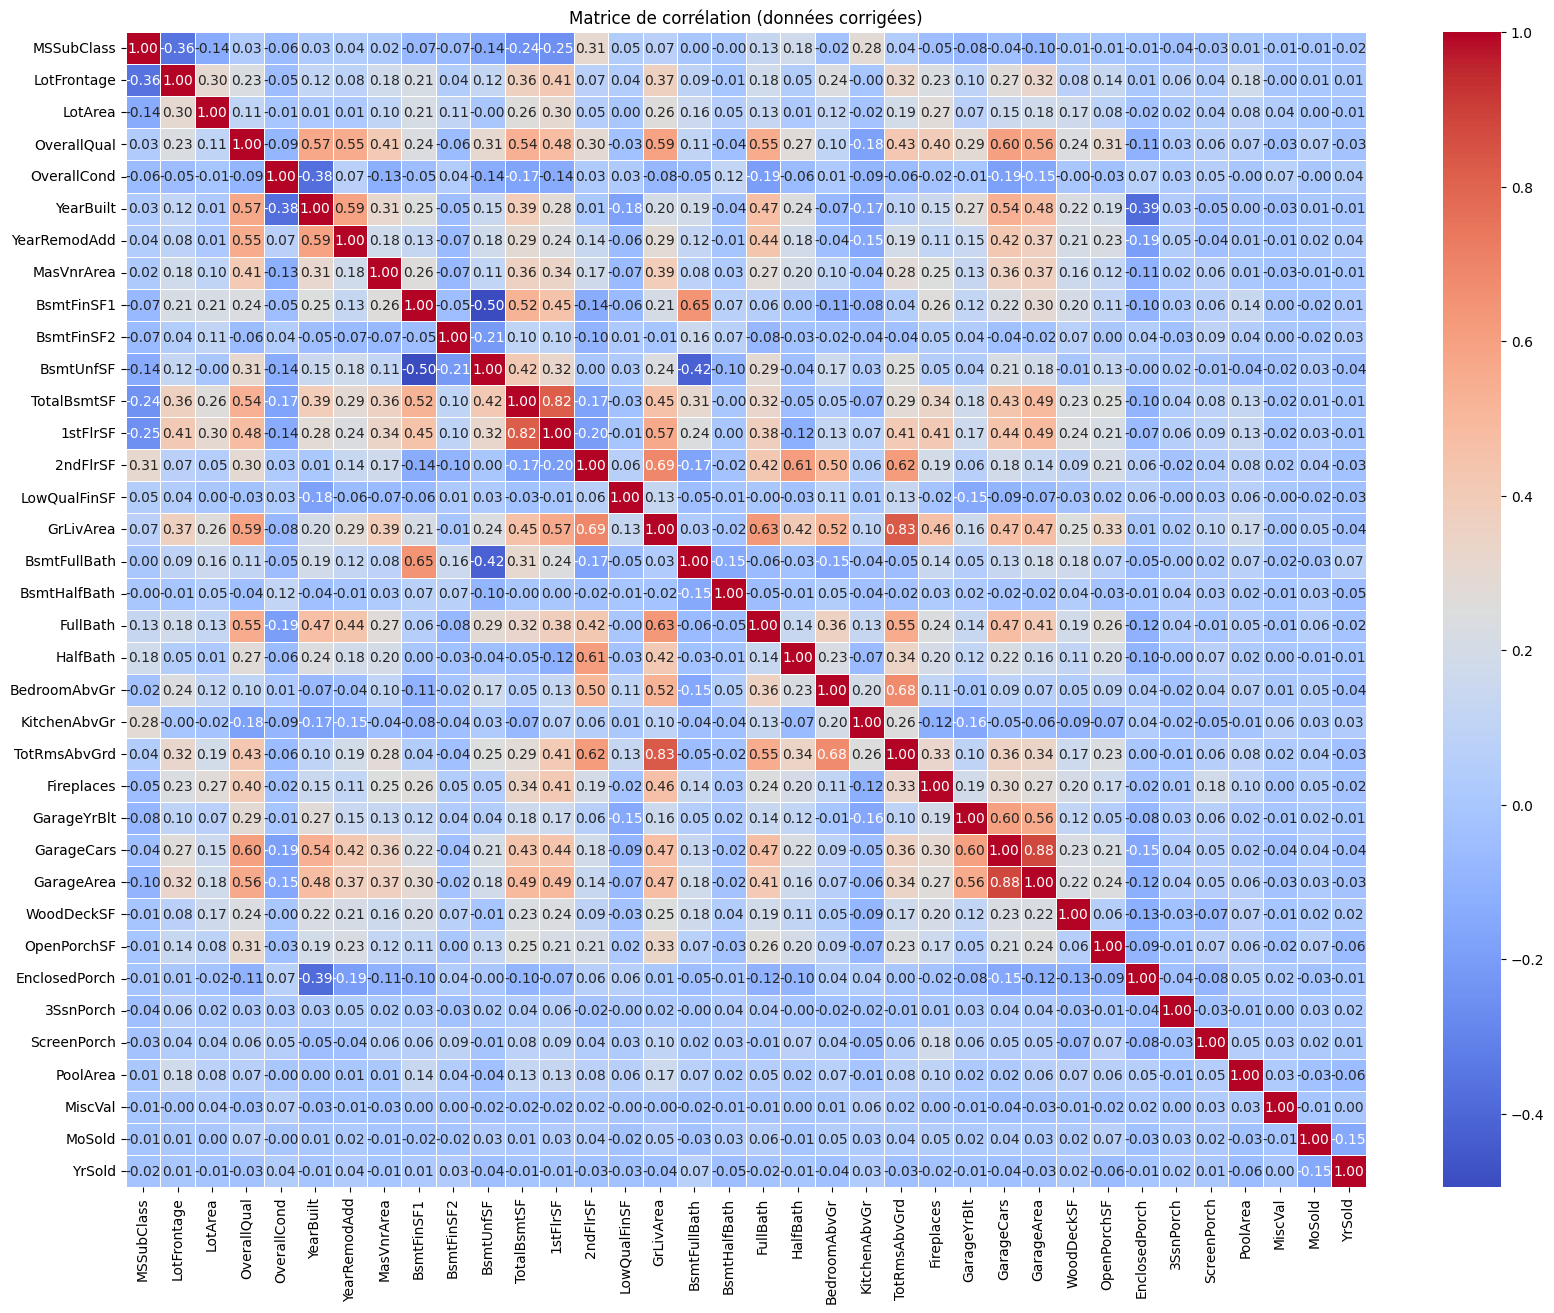

In [111]:
numeric_data = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation (données corrigées)')
plt.show()

Extraction des couples de variables ayant une corrélation supérieure à 0.8

In [112]:
corr_threshold = 0.8
corr_pairs = {}

for col in correlation_matrix.columns:
    corr_pairs[col] = []
    corr_values = correlation_matrix[abs(correlation_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

TotalBsmtSF - 1stFlrSF
1stFlrSF - TotalBsmtSF
GrLivArea - TotRmsAbvGrd
TotRmsAbvGrd - GrLivArea
GarageCars - GarageArea
GarageArea - GarageCars


  dropping features

In [113]:

train.drop("GarageArea", axis = 1, inplace = True)
train.drop("1stFlrSF", axis = 1, inplace = True)
train.drop("TotRmsAbvGrd", axis = 1, inplace = True)


test.drop("GarageArea", axis = 1, inplace = True)
test.drop("1stFlrSF", axis = 1, inplace = True)
test.drop("TotRmsAbvGrd", axis = 1, inplace = True)


mutual info

In [ ]:
y = y_SalePrice
train_numerical = train.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice", errors="ignore")
mutual_df = train[train_numerical]


mutual_infoN = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_infoN = pd.Series(mutual_infoN)
mutual_infoN.index = mutual_df.columns
# pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] ).style.background_gradient("cool")
pd.DataFrame(mutual_infoN.sort_values(ascending=False), columns=["Mutual Information"]).style.background_gradient("coolwarm", axis=0)
mutual_df_categorical = train[categorical_features]
#categorical features must be encoded to get mutual information
for colname in mutual_df_categorical:
   mutual_df_categorical.loc[:, colname], _ = mutual_df_categorical[colname].factorize()
mutual_infoC = mutual_info_regression(mutual_df_categorical.fillna("Do_not_have_feature"), y, random_state=1)

mutual_infoC = pd.Series(mutual_infoC)
mutual_infoC.index = mutual_df_categorical.columns
pd.DataFrame(mutual_infoC.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")
mi_thresholdN = mutual_infoN.quantile(0.1)  # Drop bottom 10% MI features
low_mi_features = mutual_infoN[mutual_infoN < mi_thresholdN].index.tolist()
train.drop(columns=low_mi_features, inplace=True)
test.drop(columns=low_mi_features, inplace=True)


AttributeError: 'DataFrame' object has no attribute 'SalePrice'

 Encoding des Features Ordinales et nominals

In [ ]:


train_ordinal = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']

train_nominal = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

test_ordinal = train_ordinal
test_nominal = train_nominal

ordinal_mappings = {
    "LotShape": ["IR3", "IR2", "IR1", "Reg"],
    "Utilities": ["ELO", "NoSeWa", "NoSewr", "AllPub"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["NA", "No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional": ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "FireplaceQu": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageFinish": ["NA", "Unf", "RFn", "Fin"],
    "GarageQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "PavedDrive": ["N", "P", "Y"],
    "PoolQC": ["NA", "Fa", "TA", "Gd", "Ex"],
    "Fence": ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"]
}

# -------------------
# Encodage Ordinal (train & test)
# -------------------

# Supprimer les espaces et remplir les valeurs manquantes avec "NA" (ou autre valeur neutre)
for col in train_ordinal:
    train[col] = train[col].astype(str).str.strip().fillna("NA")
    test[col] = test[col].astype(str).str.strip().fillna("NA")

# Initialiser et appliquer OrdinalEncoder avec gestion des valeurs inconnues
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in train_ordinal], 
                                 handle_unknown="use_encoded_value", 
                                 unknown_value=-1)

train[train_ordinal] = ordinal_encoder.fit_transform(train[train_ordinal])
test[test_ordinal] = ordinal_encoder.transform(test[test_ordinal])  # Pas de fit sur test !

# -------------------
# Encodage Nominal (Label Encoding) AVEC GESTION DES VALEURS INCONNUES
# -------------------
# --------------------------------
#label_encoders = {}

#for col in train_nominal:
#    train[col] = train[col].astype(str).fillna("Unknown")  # Gérer les NaN
#    test[col] = test[col].astype(str).fillna("Unknown")  # Même traitement pour le test
    
#    le = LabelEncoder()
#    train[col] = le.fit_transform(train[col])  # On fit sur train

    # Gérer les valeurs inconnues en test
 #   test[col] = test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

 #   label_encoders[col] = le  # Sauvegarde des encoders

# --------------------------------
train = pd.get_dummies(train, columns=train_nominal, dtype=int)
test = pd.get_dummies(test, columns=train_nominal, dtype=int)

# Aligner les colonnes de test sur train (ajouter les colonnes manquantes avec 0)
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Ajouter les colonnes manquantes

# S'assurer que l'ordre des colonnes est le même
test = test[train.columns]

train = pd.concat([train, y_SalePrice], axis=1)


/var/folders/rg/r64x99yx2k91vgyysnwnb7pc0000gn/T/ipykernel_57500/881354544.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0  # Ajouter les colonnes manquantes
/var/folders/rg/r64x99yx2k91vgyysnwnb7pc0000gn/T/ipykernel_57500/881354544.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0  # Ajouter les colonnes manquantes
/var/folders/rg/r64x99yx2k91vgyysnwnb7pc0000gn/T/ipykernel_57500/881354544.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

In [ ]:
print(train.shape

,test.shape)

(1460, 221) (1459, 221)


In [ ]:
test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLw    ', 'SaleType_New      ', 'SaleType_Oth      ',
       'SaleType_WD       ', 'SaleCondition_Abnorml       ',
       'SaleCondition_AdjLand       ', 'SaleCondition_Alloca        ',
       'SaleCondition_Family        ', 'SaleCondition_Normal        ',
       'SaleCondition_Partial       '],
      dtype='object', length=221)

final Data

In [ ]:
train.to_csv('final_data.csv', index=False)

test.to_csv('final_test_data.csv', index=False)
